<a href="https://colab.research.google.com/github/Drew128/Task20200209/blob/master/Task_test4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Тест аналитик_Х (1) (1) (1) (1) (1) (2).xlsx to Тест аналитик_Х (1) (1) (1) (1) (1) (2).xlsx


In [69]:
import pandas as pd
import numpy as np

df = pd.read_excel("Тест аналитик_Х (1) (1) (1) (1) (1) (2).xlsx", sheet_name='Test_4',  header=10, parse_dates=True)
df = df[['rd', 'customer_id', 'TD', 'revenue_usd']]
df.head()

,rd,customer_id,TD,revenue_usd
0,2017-11-24,981511946,2018-05-22 00:00:00,4.62115
1,2017-11-24,981511946,2019-06-08 00:00:00,4.62247
2,2017-11-24,981511946,2018-05-14 00:00:00,0
3,2017-11-24,981511949,(null),(null)
4,2017-11-24,981511950,(null),(null)


In [153]:
df['TD'] = pd.to_datetime(df['TD'], format="%Y-%m-%d", errors = 'coerce')
df['revenue_usd'] = pd.to_numeric(df['revenue_usd'], errors = 'coerce')
df['date_diff'] = df['TD'] - df['rd']
df['date_diff'].replace({pd.NaT: pd.Timedelta(days=0)}, inplace=True)    # replace date_diff for rows with no payments to 0 days
df.head()

,rd,customer_id,TD,revenue_usd,date_diff
0,2017-11-24,981511946,2018-05-22,4.621145,179 days
1,2017-11-24,981511946,2019-06-08,4.622467,561 days
2,2017-11-24,981511946,2018-05-14,0.000000,171 days
3,2017-11-24,981511949,NaT,NaN,0 days
4,2017-11-24,981511950,NaT,NaN,0 days


In [239]:
# We have a cumulative amount of revenue for every user
# So we should add only last(biggest) sum per each client, till observed day
def sum_of_max_values_per_user_till_date(date_diff): 
  return df[df['date_diff'] <= date_diff].groupby('customer_id')['revenue_usd'].max().sum()


cumulative = df[['date_diff']].groupby('date_diff').count()
cumulative['date_diff'] = cumulative.index
cumulative["customers"] = df['customer_id'].nunique()    #unique customers count
cumulative['USD'] = cumulative['date_diff'].apply(sum_of_max_values_per_user_till_date)
cumulative['LTV_per_users'] = cumulative['USD']/cumulative['customers']    #LTV usd per customer 
cumulative['month'] = cumulative['date_diff']/np.timedelta64(1, 'M')
cumulative.tail()


,date_diff,customers,USD,LTV_per_users,month
date_diff,,,,,
603 days,603 days,3576,1150.657677,0.321772,19.811495
610 days,610 days,3576,1150.657677,0.321772,20.041479
617 days,617 days,3576,1150.657677,0.321772,20.271463
624 days,624 days,3576,1150.657677,0.321772,20.501448
631 days,631 days,3576,1150.657677,0.321772,20.731432


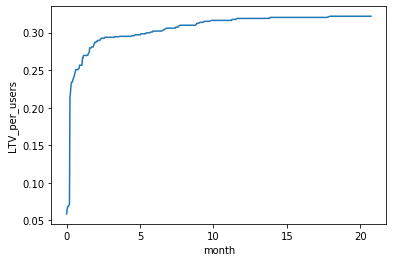

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lineplot(x="month", y="LTV_per_users", data=cumulative)

In [236]:
cumulative.loc[pd.Timedelta(days=182)]    # 6 month is approximately 182 days

date_diff        182 days 00:00:00
customers                     3576
USD                        1080.09
LTV_per_users             0.302038
month                      5.97959
Name: 182 days 00:00:00, dtype: object